In [5]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([[0,1], [1,2], [2,3], [0,2], [0,3]])
X = nx.shortest_simple_paths(G, 0, 3) #generator to find paths from 0 to 3 in order from shortest to longest.
for x in X:
    print(x)



[0, 3]
[0, 2, 3]
[0, 1, 2, 3]


In [6]:
#note that X is now empty because it is a generator
for x in X:
    print(x) #nothing to see here



In [7]:
#if you just want the first two:
X = nx.shortest_simple_paths(G, 0, 3)
for k in range(2):
    print(next(X))

[0, 3]
[0, 2, 3]


In [8]:
import pandas as pd
df_r=pd.read_csv("route_data2.csv")

In [9]:
df_r

,id,label,source,target,caption
0,r01,high_traffic,bs01,bs02,route01
1,r02,high_traffic,bs02,bs03,route02
2,r03,high_traffic,bs03,bs04,route03
3,r04,high_traffic,bs04,bs05,route04
4,r05,high_traffic,bs05,bs06,route05
5,r06,medium_traffic,bs06,bs07,route06
6,r07,medium_traffic,bs07,bs08,route07
7,r08,medium_traffic,bs08,bs09,route08
8,r09,medium_traffic,bs09,bs10,route09
9,r10,medium_traffic,bs10,bs11,route10


In [10]:
series1 = pd.Series(df_r['source'])
series2 = pd.Series(df_r['target'])
df_unique = pd.concat([series1, series2], axis = 0)

In [11]:
df_unique

0     bs01
1     bs02
2     bs03
3     bs04
4     bs05
      ... 
40    bs19
41    bs16
42    bs20
43    bs14
44    bs04
Length: 90, dtype: object

In [12]:
df1 = df_r[['source','target']].melt(value_name='New_column')[['New_column']]

In [13]:
df1

,New_column
0,bs01
1,bs02
2,bs03
3,bs04
4,bs05
...,...
85,bs19
86,bs16
87,bs20
88,bs14


In [14]:
df1.drop_duplicates(inplace=True)

In [21]:
df1=df1.sort_values(by=['New_column'], ascending=True)

In [22]:
df1['new_col'] = range(1, len(df1) + 1)

In [23]:
df1

,New_column,new_col
0,bs01,1
1,bs02,2
2,bs03,3
3,bs04,4
4,bs05,5
5,bs06,6
6,bs07,7
7,bs08,8
8,bs09,9
9,bs10,10


In [25]:
dict1=df1.set_index('New_column').T.to_dict('list')

In [26]:
dict1

{'bs01': [1],
 'bs02': [2],
 'bs03': [3],
 'bs04': [4],
 'bs05': [5],
 'bs06': [6],
 'bs07': [7],
 'bs08': [8],
 'bs09': [9],
 'bs10': [10],
 'bs11': [11],
 'bs12': [12],
 'bs13': [13],
 'bs14': [14],
 'bs15': [15],
 'bs16': [16],
 'bs17': [17],
 'bs18': [18],
 'bs19': [19],
 'bs20': [20]}

In [74]:
res = [key for key, value in dict1.items() if value == [1]]

In [75]:
res

['bs01']

In [30]:
df_r['source_code'] = df_r['source'].map(dict1)
df_r['target_code'] = df_r['targe'].map(dict1)

In [31]:
df_r

,id,label,source,target,caption,source_code,target_code
0,r01,high_traffic,bs01,bs02,route01,[1],[2]
1,r02,high_traffic,bs02,bs03,route02,[2],[3]
2,r03,high_traffic,bs03,bs04,route03,[3],[4]
3,r04,high_traffic,bs04,bs05,route04,[4],[5]
4,r05,high_traffic,bs05,bs06,route05,[5],[6]
5,r06,medium_traffic,bs06,bs07,route06,[6],[7]
6,r07,medium_traffic,bs07,bs08,route07,[7],[8]
7,r08,medium_traffic,bs08,bs09,route08,[8],[9]
8,r09,medium_traffic,bs09,bs10,route09,[9],[10]
9,r10,medium_traffic,bs10,bs11,route10,[10],[11]


In [32]:
df_r['edges'] = df_r['source_code'] + df_r['target_code']

In [35]:
input_edges=list(df_r['edges'])

In [40]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(input_edges)
X = nx.shortest_simple_paths(G, 1, 5) #generator to find paths from 0 to 3 in order from shortest to longest.
for k in range(5):
    print(next(X))

[1, 6, 5]
[1, 2, 3, 5]
[1, 20, 19, 5]
[1, 13, 4, 5]
[1, 6, 7, 4, 5]


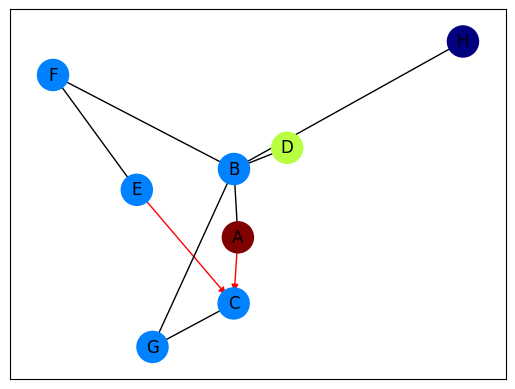

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()


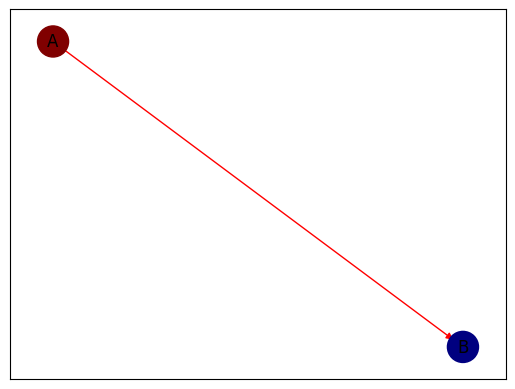

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'B')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

In [51]:
mylist=[1, 20, 19, 5]
test_list = [mylist]

In [52]:
test_list

[[1, 20, 19, 5]]

In [53]:
res = []
for sub in test_list:
  res.append((sub[0], sub[1]))
  res.append((sub[1], sub[2]))

In [54]:
res

[(1, 20), (20, 19)]

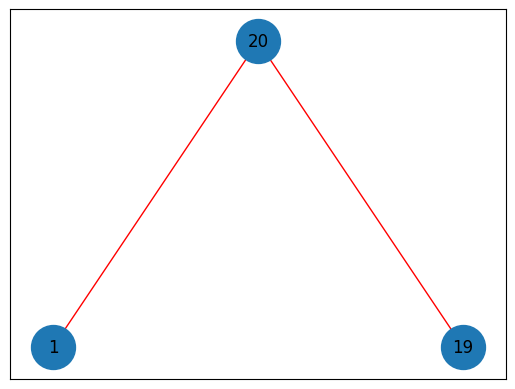

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    res)

# val_map = {'A': 1.0,
#            'D': 0.5714285714285714,
#            'H': 0.0}

# values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = res
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spectral_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                        node_size = 1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)

plt.show()